# Random Forest model for Breast Cancer Wisconsin Data

In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Load dataset
data_path = r'C:\Users\mehar\OneDrive - Durham College\Documents\PythonData1200\Artificial Intelligence\wdbc.data'
names_path = r'C:\Users\mehar\OneDrive - Durham College\Documents\PythonData1200\Artificial Intelligence\wdbc.names'

In [3]:
# Corrected column names based on dataset structure
column_names = ['ID', 'Diagnosis'] + [
    'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean',
    'Compactness_mean', 'Concavity_mean', 'Concave_points_mean', 'Symmetry_mean', 'Fractal_dimension_mean',
    'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se', 'Smoothness_se',
    'Compactness_se', 'Concavity_se', 'Concave_points_se', 'Symmetry_se', 'Fractal_dimension_se',
    'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst', 'Smoothness_worst',
    'Compactness_worst', 'Concavity_worst', 'Concave_points_worst', 'Symmetry_worst', 'Fractal_dimension_worst'
]

In [4]:
# Load data into a pandas DataFrame with the corrected column names
data = pd.read_csv(data_path, header=None, names=column_names)

In [5]:
# Drop the ID column as it is not needed for the model
data.drop('ID', axis=1, inplace=True)

In [6]:
# Convert Diagnosis to binary (M=1, B=0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

In [7]:
# Display basic statistics
print("Basic Statistics:")
print(data.describe())

Basic Statistics:
        Diagnosis  Radius_mean  Texture_mean  Perimeter_mean    Area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       Smoothness_mean  Compactness_mean  Concavity_mean  Concave_points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [8]:
# Distribution of the target variable
print("\nDistribution of Diagnosis:")
print(data['Diagnosis'].value_counts())


Distribution of Diagnosis:
0    357
1    212
Name: Diagnosis, dtype: int64


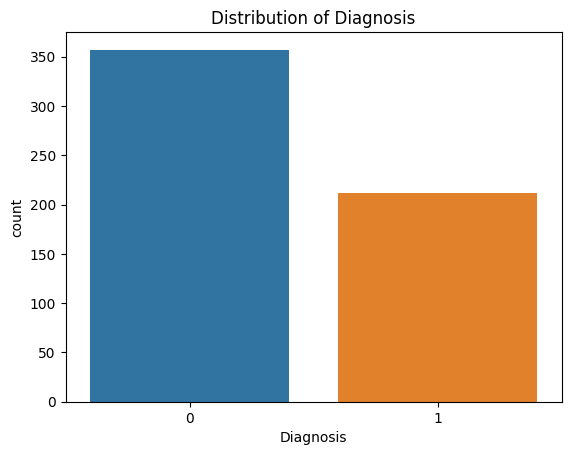

In [9]:
# Visualize the distribution of the target variable
sns.countplot(x='Diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

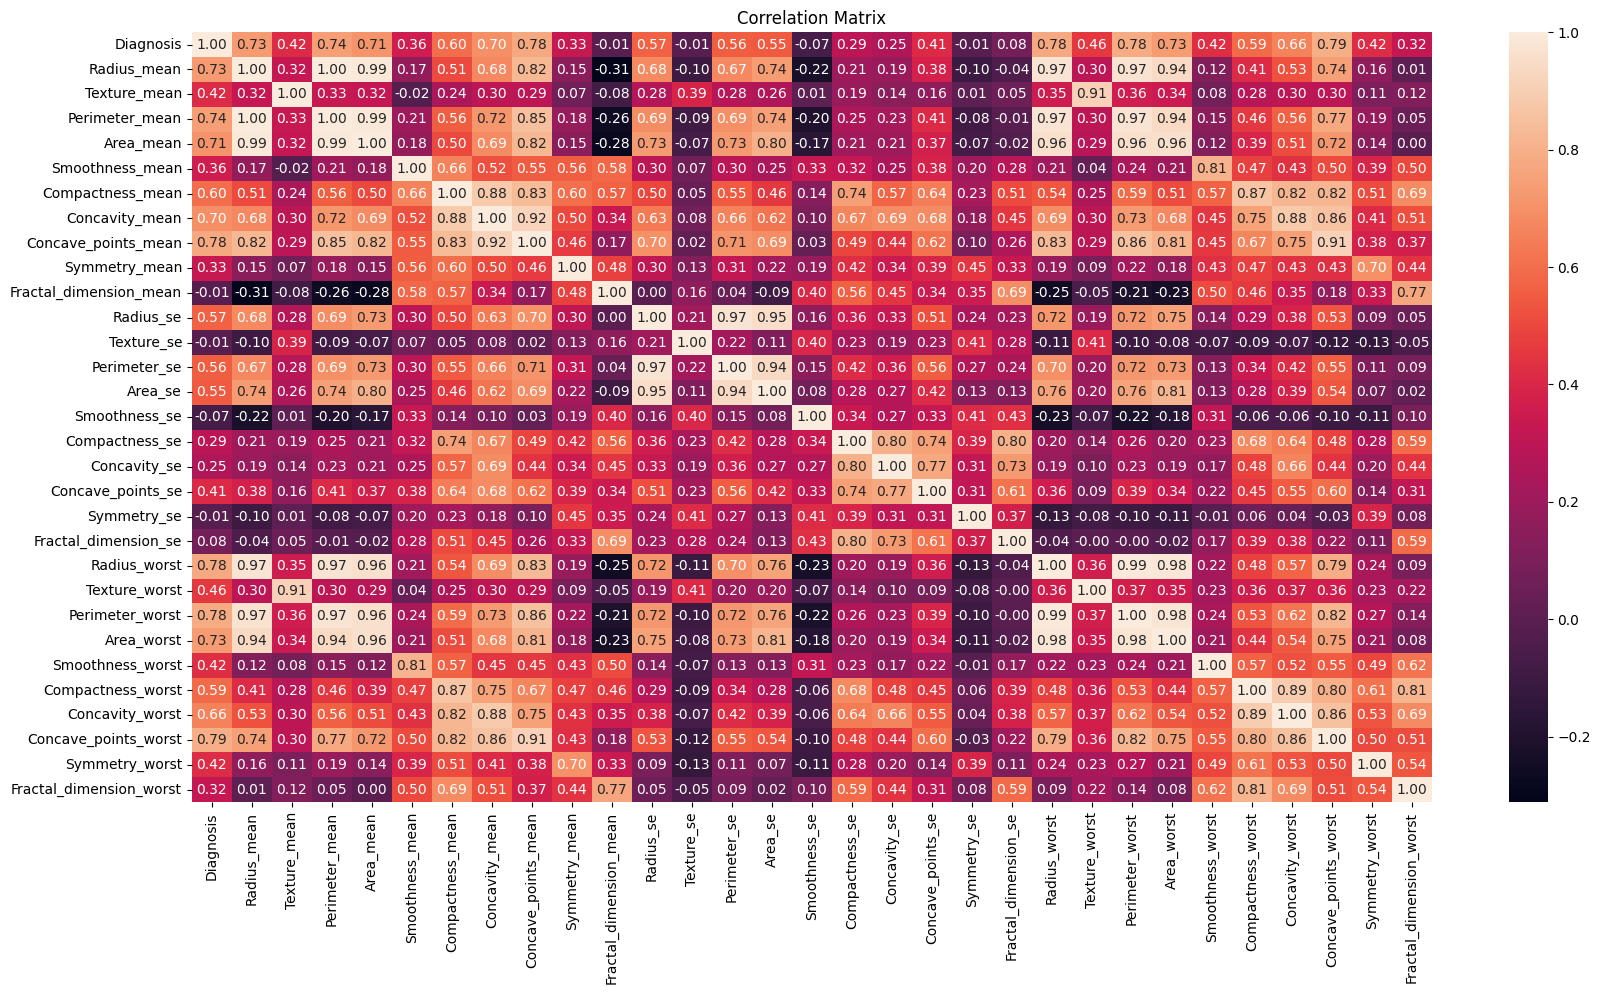

In [10]:
# Correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Count of missing values
print("\nMissing Values Count:")
print(data.isnull().sum())


Missing Values Count:
Diagnosis                  0
Radius_mean                0
Texture_mean               0
Perimeter_mean             0
Area_mean                  0
Smoothness_mean            0
Compactness_mean           0
Concavity_mean             0
Concave_points_mean        0
Symmetry_mean              0
Fractal_dimension_mean     0
Radius_se                  0
Texture_se                 0
Perimeter_se               0
Area_se                    0
Smoothness_se              0
Compactness_se             0
Concavity_se               0
Concave_points_se          0
Symmetry_se                0
Fractal_dimension_se       0
Radius_worst               0
Texture_worst              0
Perimeter_worst            0
Area_worst                 0
Smoothness_worst           0
Compactness_worst          0
Concavity_worst            0
Concave_points_worst       0
Symmetry_worst             0
Fractal_dimension_worst    0
dtype: int64


In [12]:
# Extract features and target variable
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create a pipeline with data scaling and random forest classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

In [15]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

In [16]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

In [18]:
# Print results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report_result)

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

